## This notebook does the following:

- Count sequences length
- Count letter occurences
- ML Modeling
    - Use letter counts as features (tf-idf)
    - Naive Bayes
    - SVM
    - Random forest
    - Oversampling (duplicating positive samples) and repeat the above 3
    - Conclusion: Not working

- To-dos (maybe): cross-validation, hyperparameters tuning, neural networks

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [6]:
def parse_fasta(file):
    genomes = {}
    with open(file, "r") as f:
        for line in f:
            line = line.replace('\n', '')
            if line.startswith(">"):
                curr = line
                genomes[curr] = ''
                continue
            genomes[curr] = genomes[curr] + line
    return genomes

In [7]:
genbank_fasta = 'mycovirus_genbank_all_refseq_nucleotide_unique.fasta'
Sclerotinia_fasta = 'Sclerotinia_biocontrol_mycovirus_nucleotide.fasta'

In [9]:
genbank = parse_fasta(genbank_fasta)
Sclerotinia = parse_fasta(Sclerotinia_fasta)

In [ ]:
genbank['>NC_000960.1 Cryphonectria hypovirus 3, complete genome']

In [239]:
max([len(genbank[a]) for a in genbank])

23635

# Height vs sample# (negative)

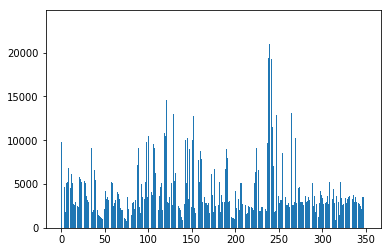

In [45]:
plt.bar(range(len(genbank)),[len(genbank[a]) for a in genbank])
plt.show()

# Height vs sample# (positive)

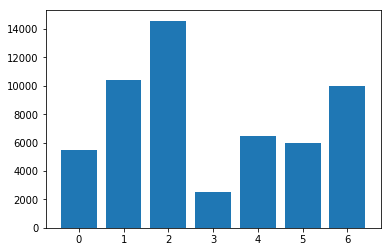

In [46]:
plt.bar(range(len(Sclerotinia)),[len(Sclerotinia[a]) for a in Sclerotinia])
plt.show()

In [67]:
all_sequences = [genbank[a] for a in genbank] + [Sclerotinia[a] for a in Sclerotinia]

# Use sklearn to count letters

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
count_vect = CountVectorizer(analyzer='char')
X = count_vect.fit_transform(all_sequences)

In [93]:
chars = count_vect.get_feature_names()

In [94]:
one_gram = X.toarray()

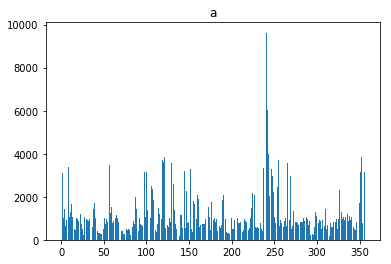

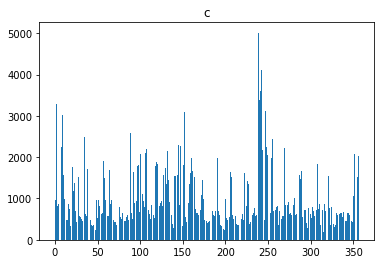

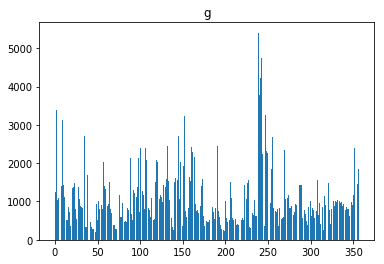

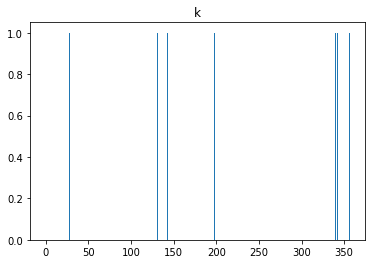

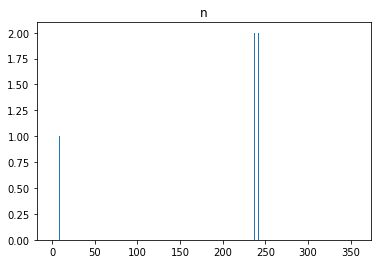

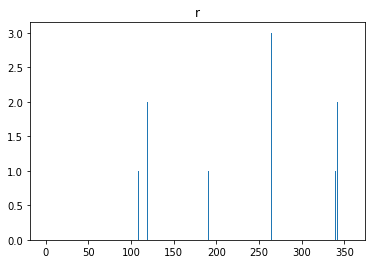

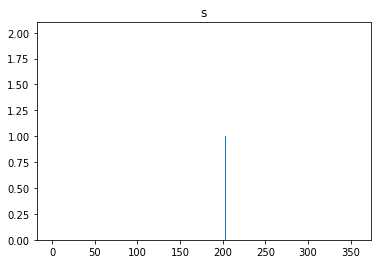

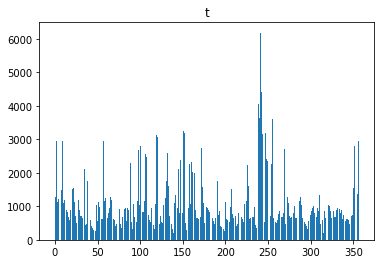

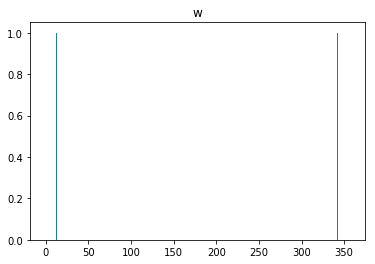

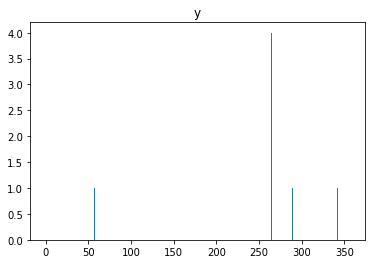

In [86]:
# 1-gram counts vs sample#
for i in range(len(chars)):
    plt.bar(range(len(one_gram)), one_gram[:,i])
    plt.title(chars[i])
    plt.show()

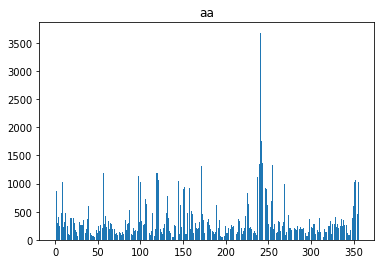

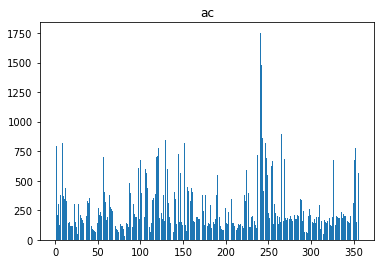

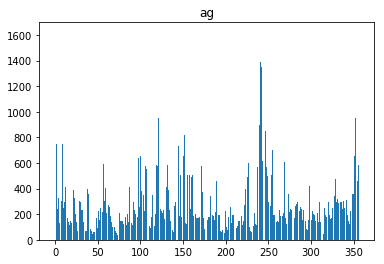

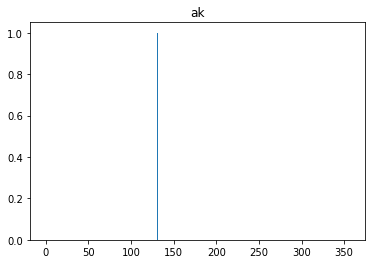

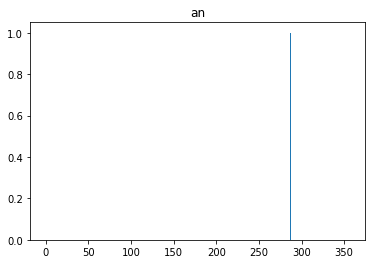

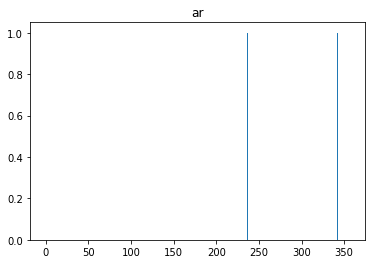

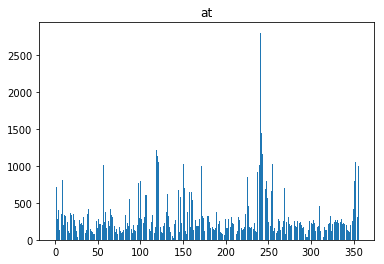

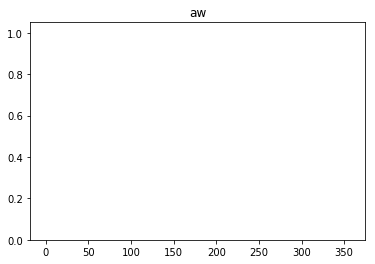

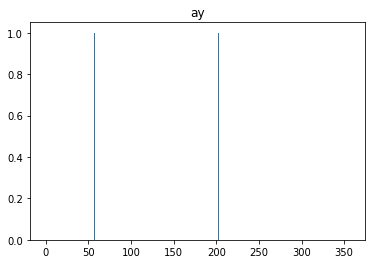

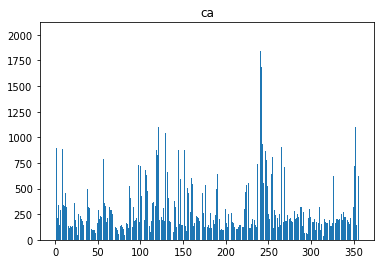

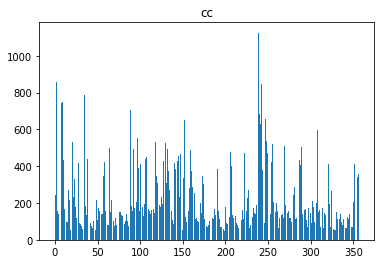

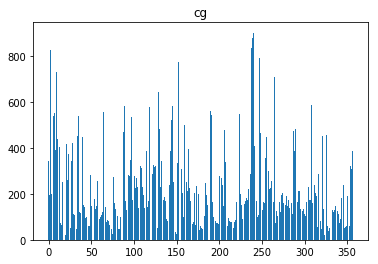

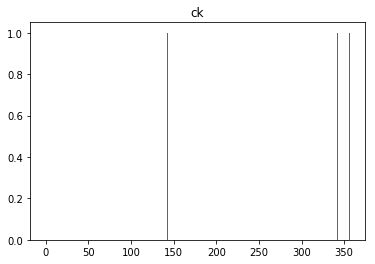

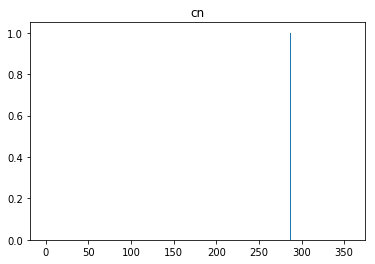

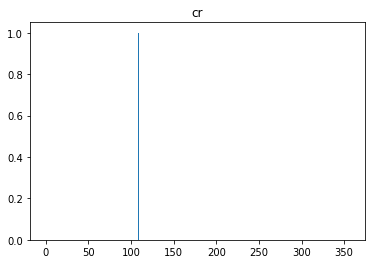

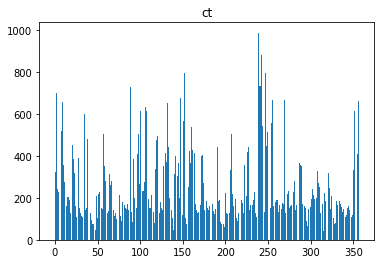

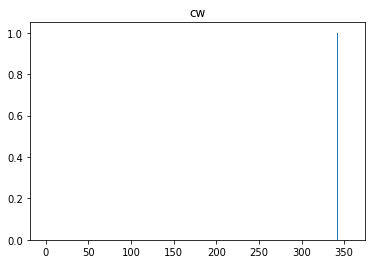

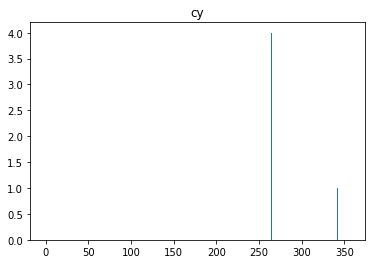

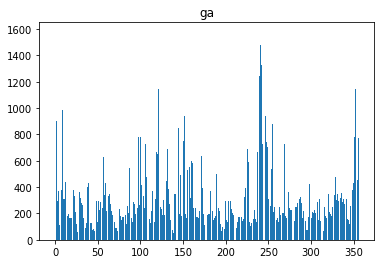

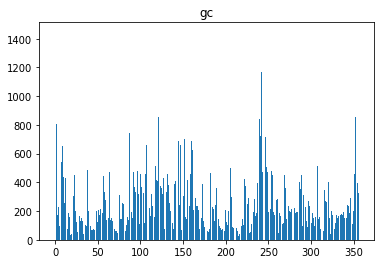

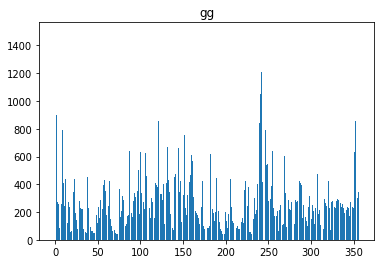

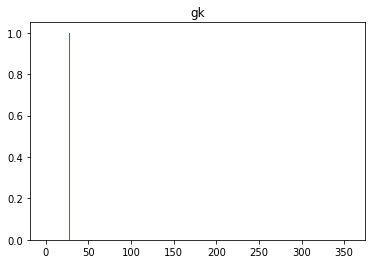

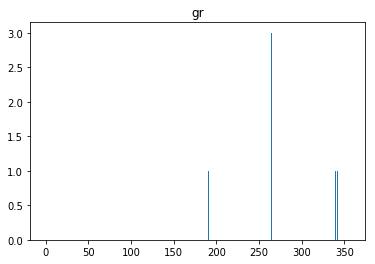

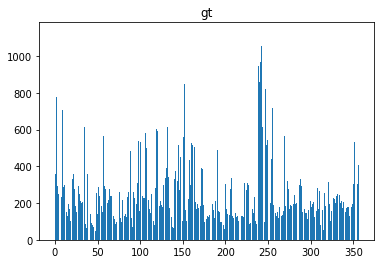

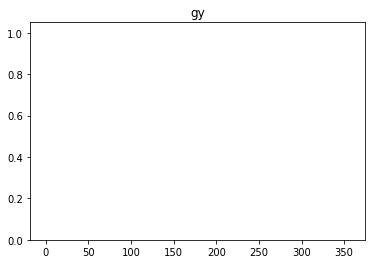

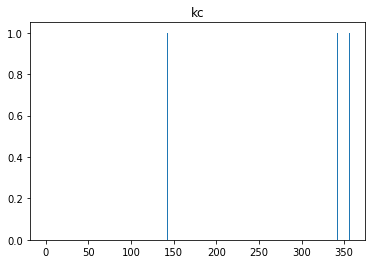

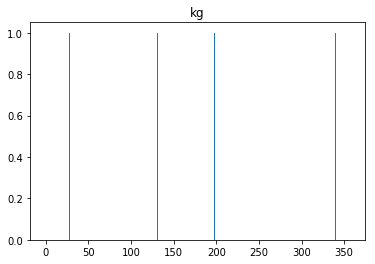

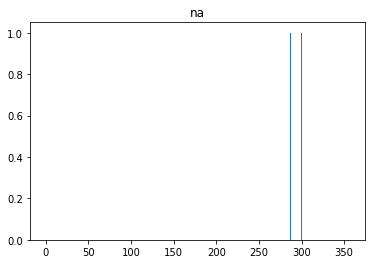

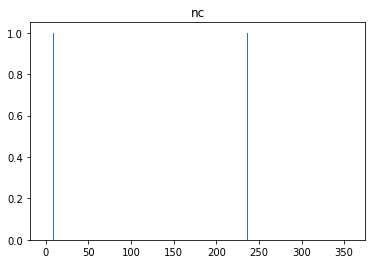

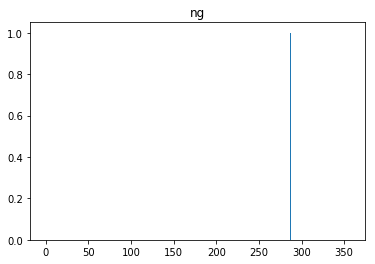

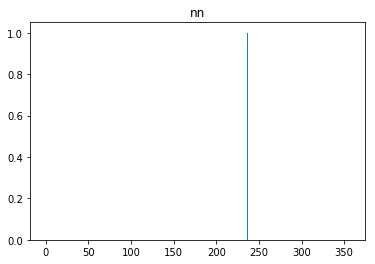

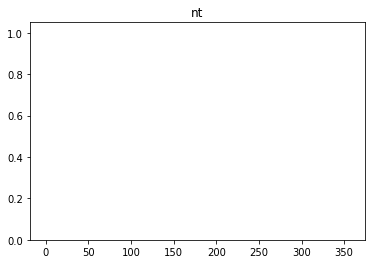

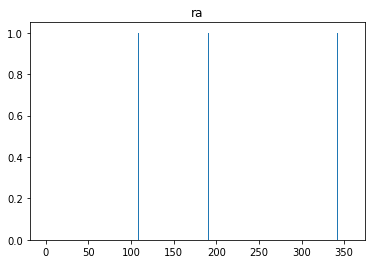

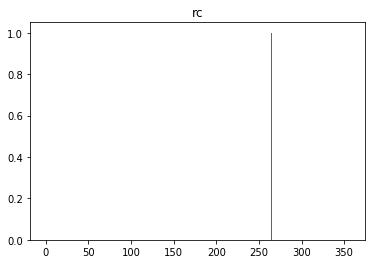

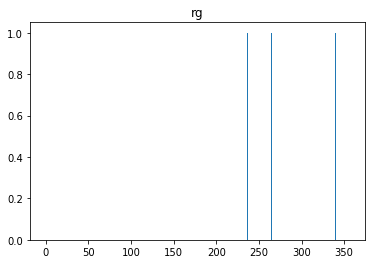

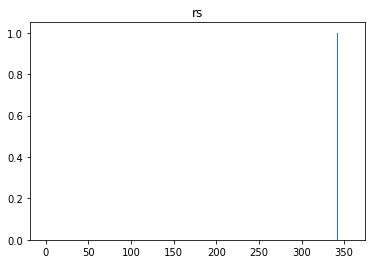

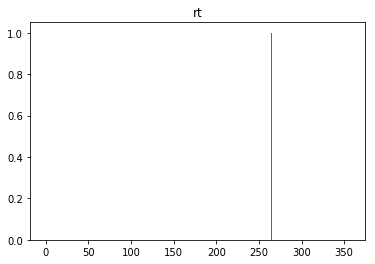

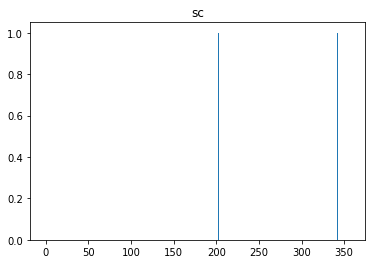

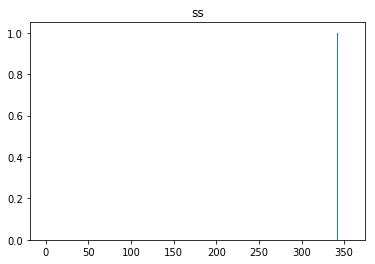

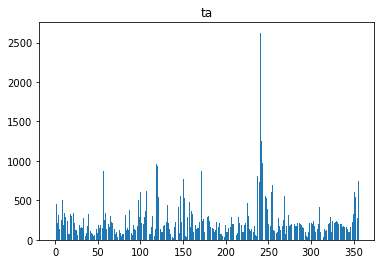

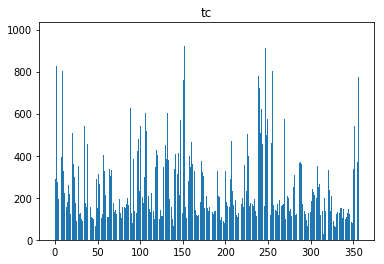

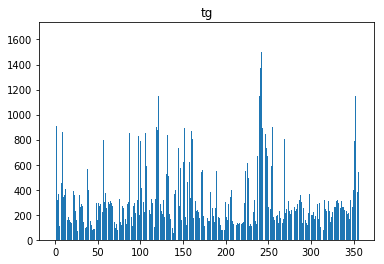

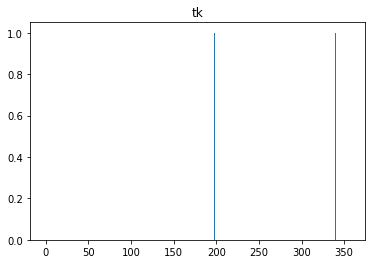

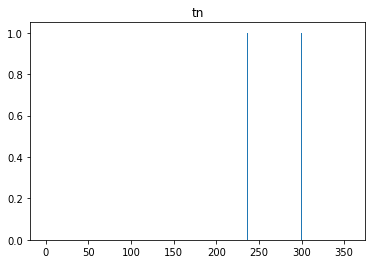

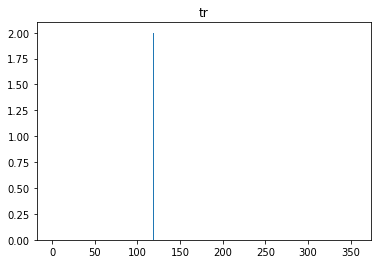

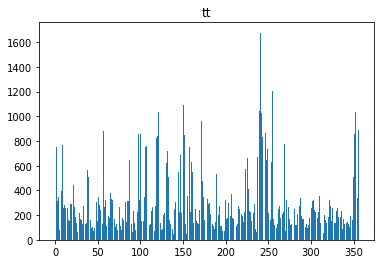

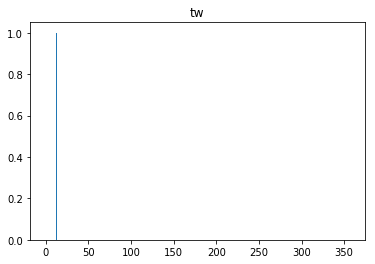

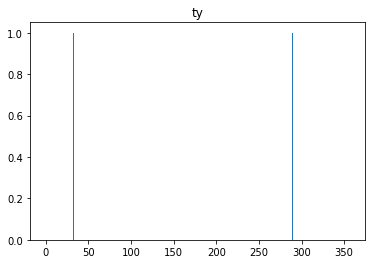

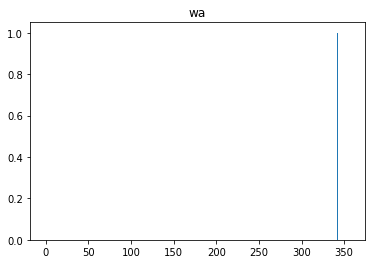

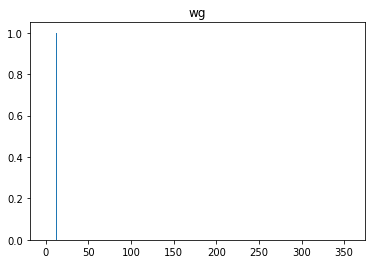

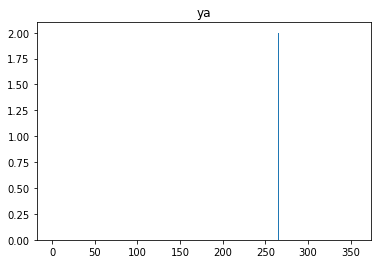

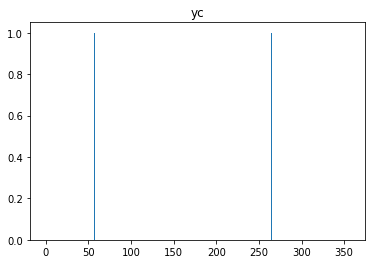

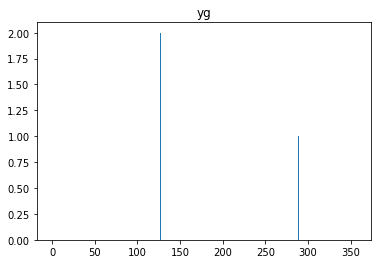

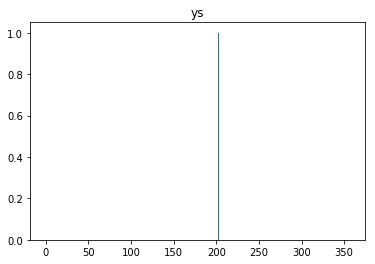

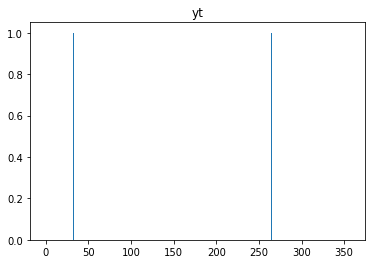

In [90]:
# 2-gram tf vs sample number
count_vect = CountVectorizer(analyzer='char',ngram_range=(2,2))
X = count_vect.fit_transform(all_sequences)
chars = count_vect.get_feature_names()
one_gram = X.toarray()
for i in range(len(chars)):
    plt.bar(range(len(one_gram)), one_gram[:,i])
    plt.title(chars[i])
    plt.show()

In [103]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X)
X_train_tf = tf_transformer.transform(X)

In [203]:

_1_2_3_gram_df = []

In [105]:
term_freq = X_train_tf.toarray()

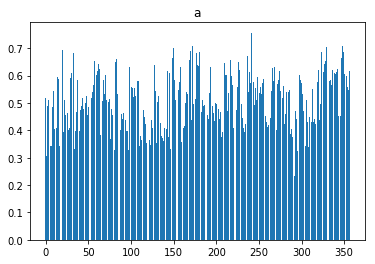

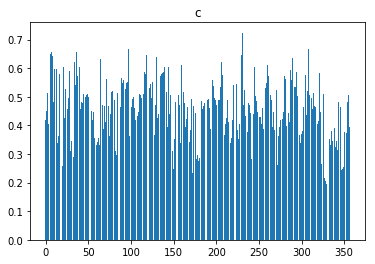

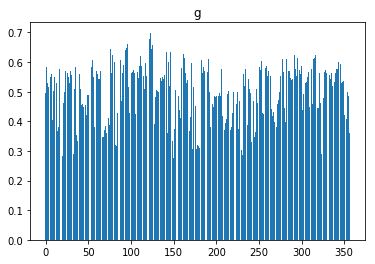

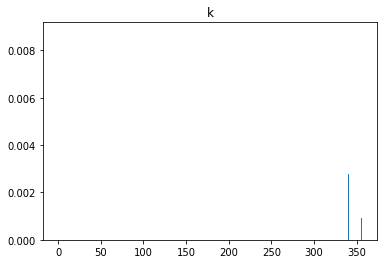

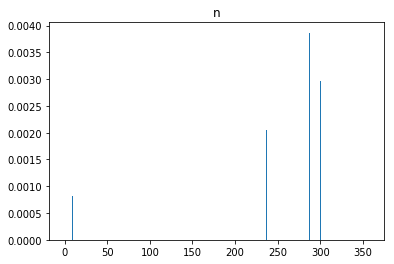

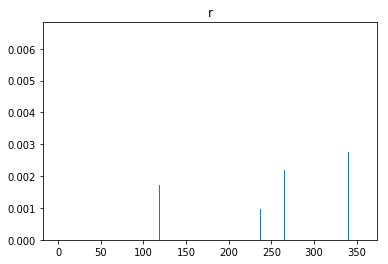

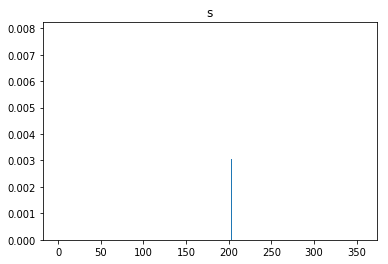

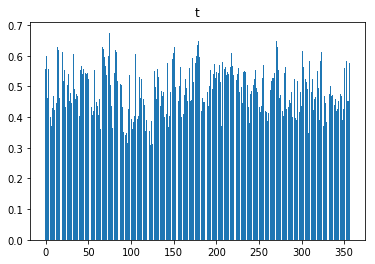

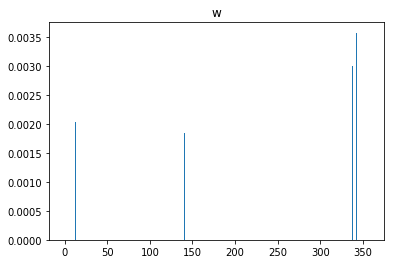

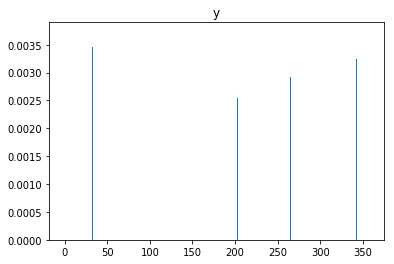

In [137]:
# tf-idf vs sample number
for i in range(len(chars)):
    plt.bar(range(len(term_freq)), term_freq[:,i])
    plt.title(chars[i])
    plt.show()

In [204]:
# (1,3)-gram
count_vect = CountVectorizer(analyzer='char',ngram_range=(1,3))
X = count_vect.fit_transform(all_sequences)
chars = count_vect.get_feature_names()
_1_2_3_gram = X.toarray()
print(chars)
print(pd.DataFrame(_1_2_3_gram,columns=chars))

['a', 'aa', 'aaa', 'aac', 'aag', 'aan', 'aar', 'aat', 'aay', 'ac', 'aca', 'acc', 'acg', 'ack', 'acn', 'acr', 'act', 'ag', 'aga', 'agc', 'agg', 'agr', 'agt', 'ak', 'akg', 'an', 'ana', 'ann', 'ar', 'ara', 'arg', 'at', 'ata', 'atc', 'atg', 'atn', 'atr', 'att', 'aty', 'aw', 'awg', 'ay', 'ayc', 'ayg', 'ays', 'c', 'ca', 'caa', 'cac', 'cag', 'cak', 'can', 'car', 'cat', 'cc', 'cca', 'ccc', 'ccg', 'cct', 'ccy', 'cg', 'cga', 'cgc', 'cgg', 'cgk', 'cgr', 'cgt', 'ck', 'ckc', 'cn', 'cng', 'cr', 'cra', 'ct', 'cta', 'ctc', 'ctg', 'ctt', 'cw', 'cwa', 'cy', 'cya', 'cyc', 'cyg', 'cyt', 'g', 'ga', 'gaa', 'gac', 'gag', 'gat', 'gaw', 'gay', 'gc', 'gca', 'gcc', 'gcg', 'gct', 'gcw', 'gcy', 'gg', 'gga', 'ggc', 'ggg', 'ggr', 'ggt', 'ggy', 'gk', 'gkg', 'gr', 'gra', 'grc', 'grg', 'grs', 'grt', 'gt', 'gta', 'gtc', 'gtg', 'gtk', 'gtt', 'gtw', 'gty', 'gy', 'gyg', 'k', 'kc', 'kca', 'kct', 'kg', 'kga', 'kgg', 'kgt', 'n', 'na', 'naa', 'nc', 'ncc', 'ncg', 'ng', 'ngg', 'nn', 'nnc', 'nnt', 'nt', 'ntg', 'r', 'ra', 'raa', '

In [205]:
# (1,3)-gram to tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(_1_2_3_gram)
X_train_tf = tf_transformer.transform(_1_2_3_gram)

In [207]:
print(X_train_tf.shape)
term_freq = X_train_tf.toarray()

(357, 225)


In [208]:
target_raw = [0 for i in range(350)] + [1 for i in range(7)]
target_raw = np.array(target_raw)
target_raw = target_raw[:, np.newaxis]

In [209]:
data_shuffled = np.concatenate((term_freq, target_raw), axis=1)
print(data_shuffled.shape)
np.random.shuffle(data_shuffled)

(357, 226)


In [211]:
X_train_tf = data_shuffled[:, :-1]
y_train_tf = data_shuffled[:, -1]

In [212]:
print(X_train_tf.shape)
print(y_train_tf.shape)

(357, 225)
(357,)


In [213]:
# train/test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tf, y_train_tf, test_size=0.3, random_state=46)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(249, 225)
(249,)
(108, 225)
(108,)


In [ ]:
# Naive bayes

In [214]:
from sklearn.naive_bayes import MultinomialNB
model_NB = MultinomialNB().fit(X_train, y_train)

In [217]:
predicted_NB = model_NB.predict(X_test)
accuracy_NB = np.mean(predicted_NB == y_test)
print('naive bayes accuracy: ' + str(round(accuracy_NB,5)))

naive bayes accuracy: 0.97222


In [218]:
print('predicted:')
print(predicted_NB)
print('actual:')
print(y_test)

predicted:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
actual:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [219]:
predicted_proba_NB = model_NB.predict_proba(X_test)[:,1]

In [220]:
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, predicted_proba_NB)
print('naive bayes roc auc: ' + str(round(roc_value,5)))

naive bayes roc auc: 0.43492


In [221]:
# Support vector machine

In [222]:
from sklearn.linear_model import SGDClassifier
model_SVM = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=46,
                          max_iter=100, tol=None)
model_SVM.fit(X_train, y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=46, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [223]:
predicted_SVM = model_SVM.predict(X_test)
accuracy_SVM = np.mean(predicted_SVM == y_test)
print('SVM accuracy: ' + str(round(accuracy_SVM,5)))
print('predicted:')
print(predicted_SVM)
print('actual:')
print(y_test)

SVM accuracy: 0.97222
predicted:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
actual:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
predicted_proba_SVM = model_SVM.predict_proba(X_test)[:,1]
roc_value_SVM = roc_auc_score(y_test, predicted_proba_SVM)
print('SVM roc auc: ' + str(round(roc_value_SVM,5)))

In [ ]:
# Random forest

In [235]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [236]:
predicted_RF = model_RF.predict(X_test)
print('predicted:')
print(predicted_RF)
print('actual:')
print(y_test)

predicted:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
actual:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [237]:
accuracy_RF = np.mean(predicted_RF == y_test)
print('Random forest accuracy: ' + str(round(accuracy_RF,5)))

Random forest accuracy: 0.96296


In [238]:
predicted_proba_RF = model_RF.predict_proba(X_test)[:,1]
roc_value_RF = roc_auc_score(y_test, predicted_proba_RF)
print('Random forest roc auc: ' + str(round(roc_value_RF,5)))

Random forest roc auc: 0.47143


In [ ]:
# oversampling

In [242]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
Xy_train = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1)
Xy_test = np.concatenate((X_test, y_test[:, np.newaxis]), axis=1)
print(Xy_train.shape)
print(Xy_test.shape)

(249, 225)
(249,)
(108, 225)
(108,)
(249, 226)
(108, 226)


In [252]:
positive_train = []
for x in Xy_train:
    if x[-1] == 1:
        positive_train.append(x)

In [253]:
len(positive_train)

4

In [257]:
duplicate_n = int((X_train.shape[0]-len(positive_train))/len(positive_train))
for i in range(duplicate_n):
    for a in positive_train:
        #print(a.shape)
        #print(Xy_train.shape)
        Xy_train = np.concatenate((Xy_train, a[np.newaxis, :]), axis=0)

In [266]:
print(Xy_train.shape)
np.random.shuffle(Xy_train)
print(Xy_train.shape)

(493, 226)
(493, 226)


In [272]:
X_train = Xy_train[:, :-1]
y_train = Xy_train[:, -1]
print(X_train.shape)
print(y_train.shape)

(493, 225)
(493,)


In [270]:
# Naive Bayes
model_NB = MultinomialNB().fit(X_train, y_train)
predicted_NB = model_NB.predict(X_test)
accuracy_NB = np.mean(predicted_NB == y_test)
print('naive bayes accuracy: ' + str(round(accuracy_NB,5)))
predicted_proba_NB = model_NB.predict_proba(X_test)[:,1]
roc_value = roc_auc_score(y_test, predicted_proba_NB)
print('naive bayes roc auc: ' + str(round(roc_value,5)))
print('predicted:')
print(predicted_NB)
print('actual:')
print(y_test)

naive bayes accuracy: 0.63889
naive bayes roc auc: 0.79048
predicted:
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]
actual:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [271]:
# SVM
model_SVM = SGDClassifier(loss='hinge', penalty='l2',
                          alpha=1e-3, random_state=46,
                          max_iter=100, tol=None)
model_SVM.fit(X_train, y_train)
predicted_SVM = model_SVM.predict(X_test)
accuracy_SVM = np.mean(predicted_SVM == y_test)
print('SVM accuracy: ' + str(round(accuracy_SVM,5)))
print('predicted:')
print(predicted_SVM)
print('actual:')
print(y_test)

SVM accuracy: 0.63889
predicted:
[1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1.]
actual:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [273]:
# Random forest
model_RF = RandomForestClassifier(n_estimators=500, 
                               bootstrap = True,
                               max_features = 'sqrt')

model_RF.fit(X_train, y_train)

predicted_RF = model_RF.predict(X_test)

accuracy_RF = np.mean(predicted_RF == y_test)
print('Random forest accuracy: ' + str(round(accuracy_RF,5)))
predicted_proba_RF = model_RF.predict_proba(X_test)[:,1]

roc_value_RF = roc_auc_score(y_test, predicted_proba_RF)
print('Random forest roc auc: ' + str(round(roc_value_RF,5)))

print('predicted:')
print(predicted_RF)
print('actual:')
print(y_test)

Random forest accuracy: 0.96296
Random forest roc auc: 0.90159
predicted:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
actual:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
